In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import visualkeras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras import layers, models, Sequential
from sklearn.preprocessing import OneHotEncoder
import joblib
from tensorflow.keras.models import load_model

# Get data train and val

In [4]:
data = pd.read_json("../raw_data/splits/train.json")
dataval = pd.read_json("../raw_data/splits/val.json")
datatest = pd.read_json("../raw_data/splits/test.json")

In [5]:
data = data.T
dataval = dataval.T
datatest = datatest.T

In [6]:
data

,author,barcode,country,dec_lat,dec_long,family,genus,image_name,image_path,infraspecific_epithet,primary_division,specific_epithet,subfamily,subspecific_epithet,token
0000e73d-4d1e-4241-a577-88103fc0961c,"(Mayer, 1851)",ETHZ-ENT0012714,Switzerland,46.31,7.8,Pieridae,Pieris,ETHZ_ENT01_2017_04_03_010614.JPG,2017_04_03R,None,Valais,mannii,Pierinae,None,0000e73d-4d1e-4241-a577-88103fc0961c
000156fb-6f29-4057-b26f-eca7ce9e9460,"(Hübner, 1806)",ETHZ-ENT0015323,Switzerland,46.76594,9.89316,Pieridae,Pieris,ETHZ_ENT01_2017_04_07_013503.JPG,2017_04_07R,None,Grisons,bryoniae,Pierinae,None,000156fb-6f29-4057-b26f-eca7ce9e9460
00025400-f7bd-477b-9363-18defd2d5466,"(Linnaeus, 1767)",ETHZ-ENT0019906,Morocco,30.2804,-9.1599,Lycaenidae,Leptotes,ETHZ_ENT01_2017_04_24_018779.JPG,2017_04_24R,None,Souss-Massa,pirithous,Polyommatinae,None,00025400-f7bd-477b-9363-18defd2d5466
0006c590-29cd-4a3d-8d81-26023ac346a0,"(Rottemburg, 1775)",ETHZ-ENT0013615,Switzerland,47.37659,7.740225,Nymphalidae,Melitaea,ETHZ_ENT01_2017_04_06_012762.JPG,2017_04_06R,None,Basel-Landschaft,athalia,Nymphalinae,None,0006c590-29cd-4a3d-8d81-26023ac346a0
000b01ec-1bc7-4a3c-8599-0ad88fa654e3,"(Denis & Schiffermüller, 1775)",ETHZ-ENT0042254,Switzerland,47.36836,7.73113,Nymphalidae,Erebia,ETHZ_ENT01_2017_06_13_043879.JPG,2017_06_13R,None,Basel-Landschaft,medusa,Satyrinae,None,000b01ec-1bc7-4a3c-8599-0ad88fa654e3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14ce36f1-427c-11ea-871b-887873dd81ef,"Bremer, 1864",ETHZ-ENT0012306,Russia,None,None,Nymphalidae,Erebia,ETHZ_ENT01_2017_03_31_010161.JPG,2017_03_31R,None,Primorsky,wanga,Satyrinae,None,14ce36f1-427c-11ea-871b-887873dd81ef
14ce36f2-427c-11ea-91d2-887873dd81ef,"Butler, 1868",ETHZ-ENT0012301,Spain,None,None,Nymphalidae,Erebia,ETHZ_ENT01_2017_03_31_010156.JPG,2017_03_31R,None,Andalusia,hispania,Satyrinae,None,14ce36f2-427c-11ea-91d2-887873dd81ef
14ce36f3-427c-11ea-ab8b-887873dd81ef,"(Gerhard, 1850)",ETHZ-ENT0013111,Turkey,None,None,Lycaenidae,Lycaena,ETHZ_ENT01_2017_04_04_011035.JPG,2017_04_04R,None,None,asabinus,Lycaeninae,None,14ce36f3-427c-11ea-ab8b-887873dd81ef
14ce36f4-427c-11ea-a529-887873dd81ef,"(Klug, 1832)",ETHZ-ENT0039040,Palestine,None,None,Nymphalidae,Ypthima,ETHZ_ENT01_2017_06_06_040263.JPG,2017_06_06R,None,Jericho,asterope,Satyrinae,None,14ce36f4-427c-11ea-a529-887873dd81ef


# Data preprocessing (feature creation)

In [7]:
data['species'] = data['genus']+'_'+data['specific_epithet']
dataval['species'] = dataval['genus']+'_'+dataval['specific_epithet']
datatest['species'] = datatest['genus']+'_'+datatest['specific_epithet']

In [8]:
data["path_to_image"]="../raw_data/IMG/"+data["image_name"]
dataval["path_to_image"]="../raw_data/IMG/"+dataval["image_name"]
datatest["path_to_image"]="../raw_data/IMG/"+datatest["image_name"]

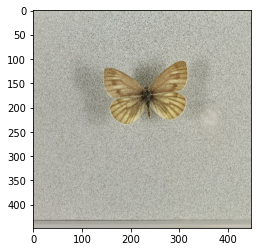

In [9]:
img = Image.open(data["path_to_image"][1])
plt.imshow(img)

In [10]:
datasample = data.sample(1000,random_state = 818)
datavalsample = dataval.sample(200,random_state = 818)
datatestsample = datatest.sample(200,random_state = 818)

# Image encoding and resize

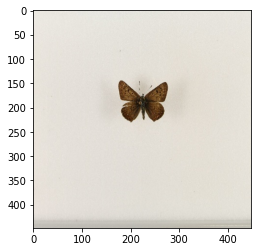

In [11]:
imageoriginal = []
for i in datasample['path_to_image'] :
    img = Image.open(i)
    imageoriginal.append(np.array(img))
img = imageoriginal[0]
plt.imshow(img)

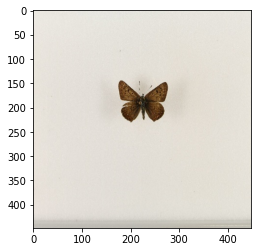

In [12]:
image = []
for i in datasample['path_to_image'] :
    img = Image.open(i)
    #img = img.resize((256,256))
    image.append(np.array(img))
img = image[0]
plt.imshow(img)

In [13]:
imageval = []
for i in datavalsample['path_to_image'] :
    img = Image.open(i)
    #img=img.resize((256,256))
    imageval.append(np.array(img))

In [14]:
len(image),image[0].shape

(1000, (448, 448, 3))

In [15]:
imagetest = []
for i in datatestsample['path_to_image'] :
    img = Image.open(i)
    #img=img.resize((256,256))
    imagetest.append(np.array(img))

# Preparation X,y,X_val,y_val

In [16]:
X = np.array(image)
y=np.array(datasample["species"])

In [17]:
X_val = np.array(imageval)
y_val =np.array(datavalsample["species"])

In [18]:
X_test = np.array(imagetest)
y_test =np.array(datatestsample["species"])

In [19]:
y.shape,y_val.shape

((1000,), (200,))

In [20]:
X.shape,X_val.shape,X_test.shape,y.shape, y_val.shape,y_test.shape

((1000, 448, 448, 3),
 (200, 448, 448, 3),
 (200, 448, 448, 3),
 (1000,),
 (200,),
 (200,))

In [21]:
y = y.reshape(1000,1)
y_val = y_val.reshape(200,1)
y_test = y_test.reshape(200,1)

In [22]:
y.shape,y_val.shape

((1000, 1), (200, 1))

In [23]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(y)
y_cat = ohe.transform(y)
y_val_cat = ohe.transform(y_val)
y_test_cat = ohe.transform(y_test)

In [34]:
y_cat.shape,y_val_cat.shape,y_test_cat.shape

((1000, 248), (200, 248), (200, 248))

# Add last layers

In [25]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', 
                                             include_top = False, input_shape = (448,448,3))



2021-08-25 23:56:33.720145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-25 23:56:33.720197: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-25 23:56:33.720217: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-AIVORVQ0): /proc/driver/nvidia/version does not exist
2021-08-25 23:56:33.720483: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


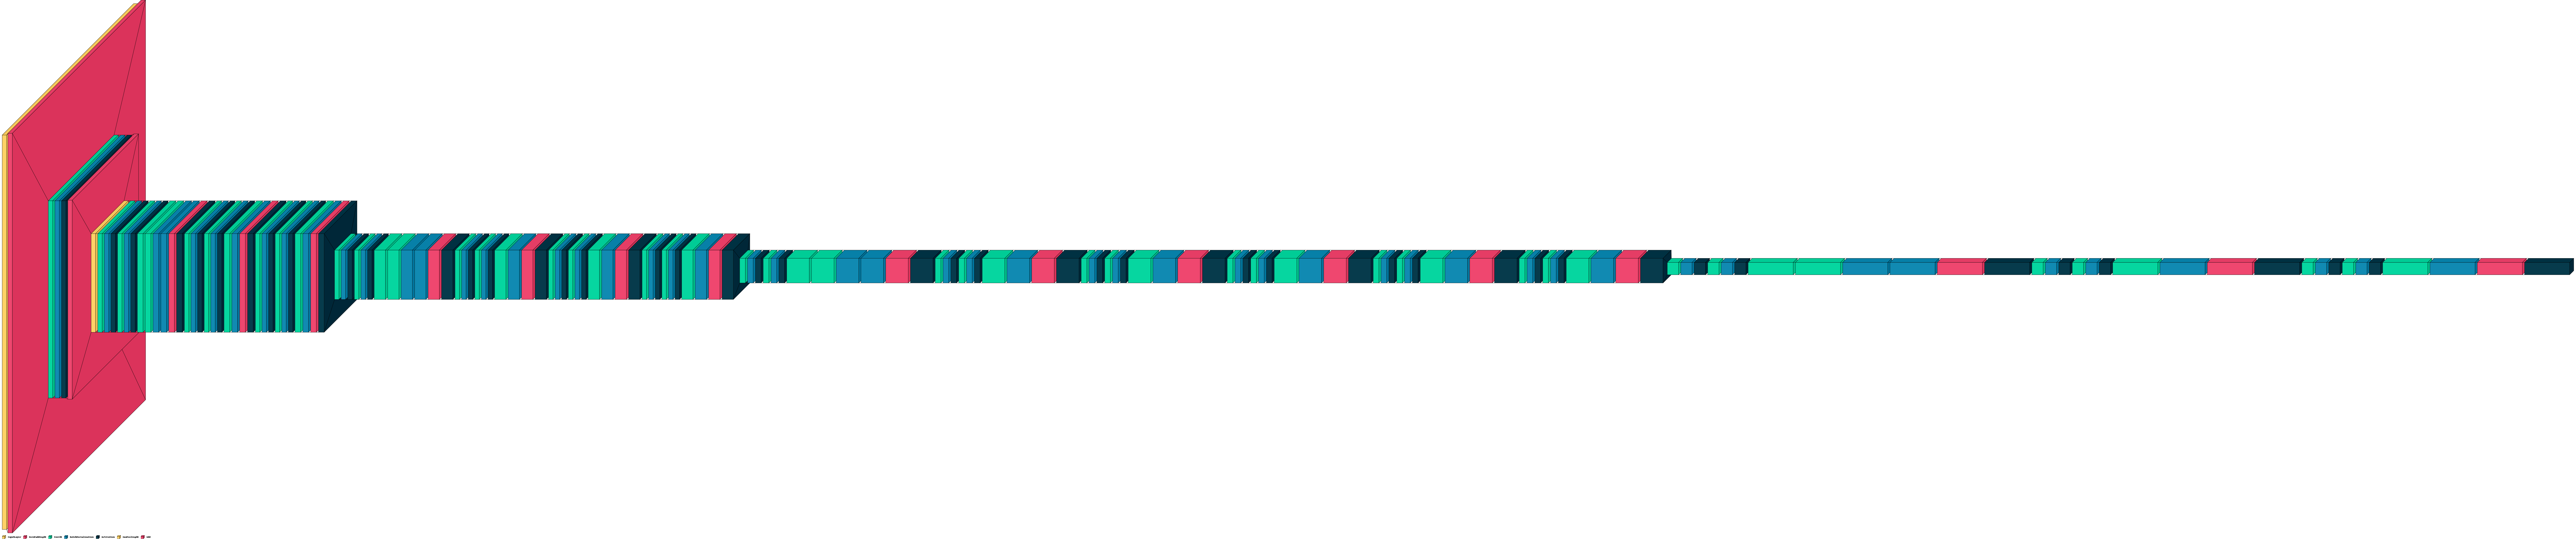

In [26]:
visualkeras.layered_view(base_model, legend=True)

In [27]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    #Layer(model,name = layers_name_list[1],trainable=False)
    #model.layers[1]=Layer(trainable=False, name=layers_name_list[1])
    #model = compile_model(model)
    for layer in model.layers: layer.trainable = False
    return model

In [28]:
def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    model = set_nontrainable_layers(model)

    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(130, activation='relu')
    prediction_layer = layers.Dense(248, activation='softmax')

    model = Sequential([model,flattening_layer,dense_layer,prediction_layer])
    return model

In [29]:
model = add_last_layers(base_model)

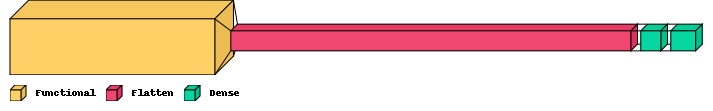

In [30]:
visualkeras.layered_view(model, legend=True)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 14, 14, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 130)               52183170  
_________________________________________________________________
dense_1 (Dense)              (None, 248)               32488     
Total params: 75,803,370
Trainable params: 52,215,658
Non-trainable params: 23,587,712
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model training

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
es = EarlyStopping(patience=5,restore_best_weights=True)
history = model.fit(X, y_cat,validation_data=(X_val,y_val_cat),
          epochs=50, 
          verbose=1,
          batch_size=32,
         callbacks=[es])

Epoch 1/50
32/32 [==============================] - 304s 10s/step - loss: 6.6817 - accuracy: 0.0500 - val_loss: 4.5730 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 277s 9s/step - loss: 5.2484 - accuracy: 0.0540 - val_loss: 4.5706 - val_accuracy: 0.0150
Epoch 3/50
32/32 [==============================] - 243s 8s/step - loss: 5.1257 - accuracy: 0.0660 - val_loss: 4.5231 - val_accuracy: 0.0200
Epoch 4/50
32/32 [==============================] - 259s 8s/step - loss: 5.0883 - accuracy: 0.0750 - val_loss: 4.6914 - val_accuracy: 0.0350
Epoch 5/50
32/32 [==============================] - 239s 8s/step - loss: 5.0693 - accuracy: 0.0850 - val_loss: 4.5084 - val_accuracy: 0.0350
Epoch 6/50
32/32 [==============================] - 269s 8s/step - loss: 5.0151 - accuracy: 0.0830 - val_loss: 4.5816 - val_accuracy: 0.0350
Epoch 7/50
32/32 [==============================] - 242s 8s/step - loss: 5.0466 - accuracy: 0.0860 - val_loss: 4.6150 - val_accuracy: 0.0350
Epoch 8/

In [37]:
history.history

{'loss': [6.681742191314697,
  5.248447418212891,
  5.125683307647705,
  5.088319301605225,
  5.069343090057373,
  5.015096664428711,
  5.046624183654785,
  4.984790802001953,
  4.955020904541016,
  4.939070224761963,
  4.936944007873535,
  4.984046459197998,
  4.920740127563477,
  4.909786701202393],
 'accuracy': [0.05000000074505806,
  0.05400000140070915,
  0.06599999964237213,
  0.07500000298023224,
  0.08500000089406967,
  0.08299999684095383,
  0.0860000029206276,
  0.0860000029206276,
  0.08299999684095383,
  0.08799999952316284,
  0.09399999678134918,
  0.07999999821186066,
  0.08699999749660492,
  0.09300000220537186],
 'val_loss': [4.572977066040039,
  4.57064151763916,
  4.523100852966309,
  4.6914262771606445,
  4.508386135101318,
  4.581638336181641,
  4.615035533905029,
  4.685363292694092,
  4.498875141143799,
  4.52613639831543,
  4.538454532623291,
  4.61976432800293,
  4.567378997802734,
  4.60361909866333],
 'val_accuracy': [0.0,
  0.014999999664723873,
  0.019999999

In [38]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 5)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

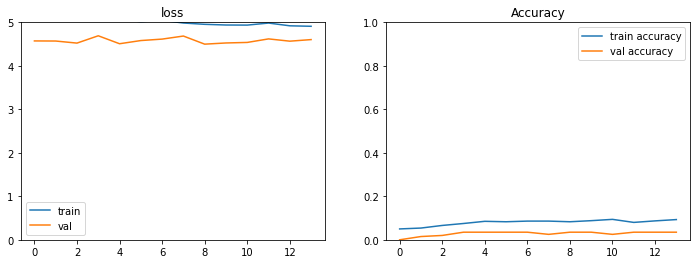

In [39]:
plot_history(history)

In [40]:
X_test.shape,y_test.shape

((200, 448, 448, 3), (200, 1))

In [41]:
model.evaluate(X_test,y_test_cat)

7/7 [==============================] - 34s 5s/step - loss: 4.5021 - accuracy: 0.0500


[4.502056121826172, 0.05000000074505806]

In [42]:
model.save("ResNet50_448")

2021-08-26 00:57:56.910329: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ResNet50_256(1)/assets


/home/garnier/.pyenv/versions/3.8.6/envs/butterfly/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
